In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Uncleaned_Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv')

In [ ]:
df.head()

,sno,jurisdiction,week_ending_date,state_abbreviation,mmwryear,mmwrweek,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type,difference_from_2015_2019_to_2020,percent_difference_from_15_19_to_20,note
0,0,New Jersey,2016-01-16T00:00:00.000,NJ,2016,2,Other select causes,43,Sepsis,2015-2019,44,Predicted (weighted),NaN,NaN,NaN
1,1,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
2,2,Alabama,2015-01-10T00:00:00.000,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN
3,3,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
4,4,Alabama,2016-01-09T00:00:00.000,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   sno                                  400000 non-null  int64  
 1   jurisdiction                         400000 non-null  object 
 2   week_ending_date                     400000 non-null  object 
 3   state_abbreviation                   400000 non-null  object 
 4   mmwryear                             400000 non-null  int64  
 5   mmwrweek                             400000 non-null  int64  
 6   cause_group                          400000 non-null  object 
 7   number_of_deaths                     400000 non-null  int64  
 8   cause_subgroup                       400000 non-null  object 
 9   time_period                          400000 non-null  object 
 10  average_number_of_deaths             400000 non-null  int64  
 11  type         

In [ ]:
df.isnull().sum()

sno                                         0
jurisdiction                                0
week_ending_date                            0
state_abbreviation                          0
mmwryear                                    0
mmwrweek                                    0
cause_group                                 0
number_of_deaths                            0
cause_subgroup                              0
time_period                                 0
average_number_of_deaths                    0
type                                        0
difference_from_2015_2019_to_2020      317628
percent_difference_from_15_19_to_20    317628
note                                   323802
dtype: int64

In [ ]:
df["week_ending_date"] = pd.to_datetime(df["week_ending_date"])
df["week_ending_date"]

0        2016-01-16
1        2015-01-10
2        2015-01-10
3        2016-01-09
4        2016-01-09
            ...    
399995   2019-11-23
399996   2019-11-23
399997   2018-11-24
399998   2018-11-24
399999   2017-11-25
Name: week_ending_date, Length: 400000, dtype: datetime64[ns]

In [ ]:
df.head(5)

,sno,jurisdiction,week_ending_date,state_abbreviation,mmwryear,mmwrweek,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type,difference_from_2015_2019_to_2020,percent_difference_from_15_19_to_20,note
0,0,New Jersey,2016-01-16,NJ,2016,2,Other select causes,43,Sepsis,2015-2019,44,Predicted (weighted),NaN,NaN,NaN
1,1,Alabama,2015-01-10,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
2,2,Alabama,2015-01-10,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN
3,3,Alabama,2016-01-09,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Predicted (weighted),NaN,NaN,NaN
4,4,Alabama,2016-01-09,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Unweighted,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   sno                                  400000 non-null  int64         
 1   jurisdiction                         400000 non-null  object        
 2   week_ending_date                     400000 non-null  datetime64[ns]
 3   state_abbreviation                   400000 non-null  object        
 4   mmwryear                             400000 non-null  int64         
 5   mmwrweek                             400000 non-null  int64         
 6   cause_group                          400000 non-null  object        
 7   number_of_deaths                     400000 non-null  int64         
 8   cause_subgroup                       400000 non-null  object        
 9   time_period                          400000 non-null  object        
 

In [ ]:
#dropping unneccessary values
df.drop(columns = ['note','difference_from_2015_2019_to_2020', 'percent_difference_from_15_19_to_20','sno'], inplace=True)

In [ ]:
#dropping duplicate values
df = df.drop(df[df['type'] == 'Unweighted'].index)

In [ ]:
# Cleaning Column Names
df.rename(columns={'mmwryear': 'year', 'mmwrweek': 'week'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 399998
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   jurisdiction              200000 non-null  object        
 1   week_ending_date          200000 non-null  datetime64[ns]
 2   state_abbreviation        200000 non-null  object        
 3   year                      200000 non-null  int64         
 4   week                      200000 non-null  int64         
 5   cause_group               200000 non-null  object        
 6   number_of_deaths          200000 non-null  int64         
 7   cause_subgroup            200000 non-null  object        
 8   time_period               200000 non-null  object        
 9   average_number_of_deaths  200000 non-null  int64         
 10  type                      200000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 18.3+ MB


In [ ]:
df.head(5)

,jurisdiction,week_ending_date,state_abbreviation,year,week,cause_group,number_of_deaths,cause_subgroup,time_period,average_number_of_deaths,type
0,New Jersey,2016-01-16,NJ,2016,2,Other select causes,43,Sepsis,2015-2019,44,Predicted (weighted)
1,Alabama,2015-01-10,AL,2015,1,Other select causes,22,Sepsis,2015-2019,24,Predicted (weighted)
3,Alabama,2016-01-09,AL,2016,1,Other select causes,13,Sepsis,2015-2019,24,Predicted (weighted)
5,Alabama,2017-01-07,AL,2017,1,Other select causes,24,Sepsis,2015-2019,24,Predicted (weighted)
7,Alabama,2018-01-06,AL,2018,1,Other select causes,31,Sepsis,2015-2019,24,Predicted (weighted)


In [ ]:
disease_jurisdiction = pd.DataFrame(df)
disease_jurisdiction.to_csv("Cleaned_Weekly_Counts_of_Death_by_Jurisdiction_and_Select_Causes_of_Death.csv", index= False)

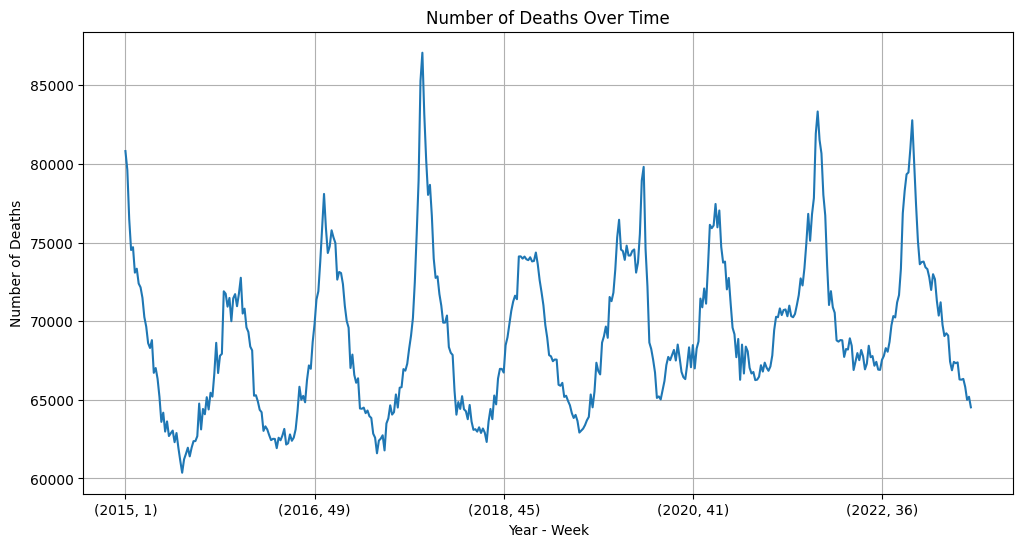

In [ ]:
# Time Trends - Time Series Plot
time_series = df.groupby(["year", "week"])["number_of_deaths"].sum()
time_series.plot(figsize=(12, 6))
plt.title("Number of Deaths Over Time")
plt.xlabel("Year - Week")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()

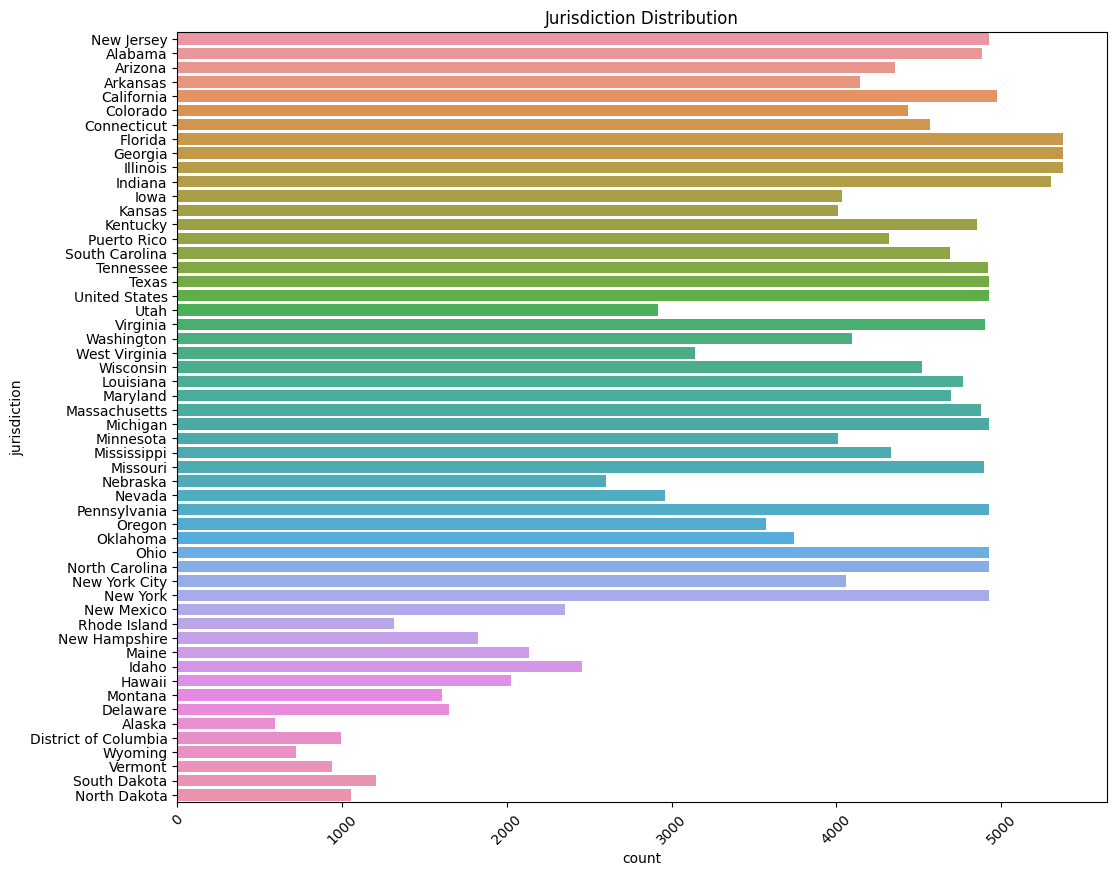

In [ ]:
# Geographical Analysis - Count Plot by Jurisdiction
plt.figure(figsize=(12, 10))
sns.countplot(y=df['jurisdiction'])
plt.title("Jurisdiction Distribution")
plt.xticks(rotation=45)
plt.show()

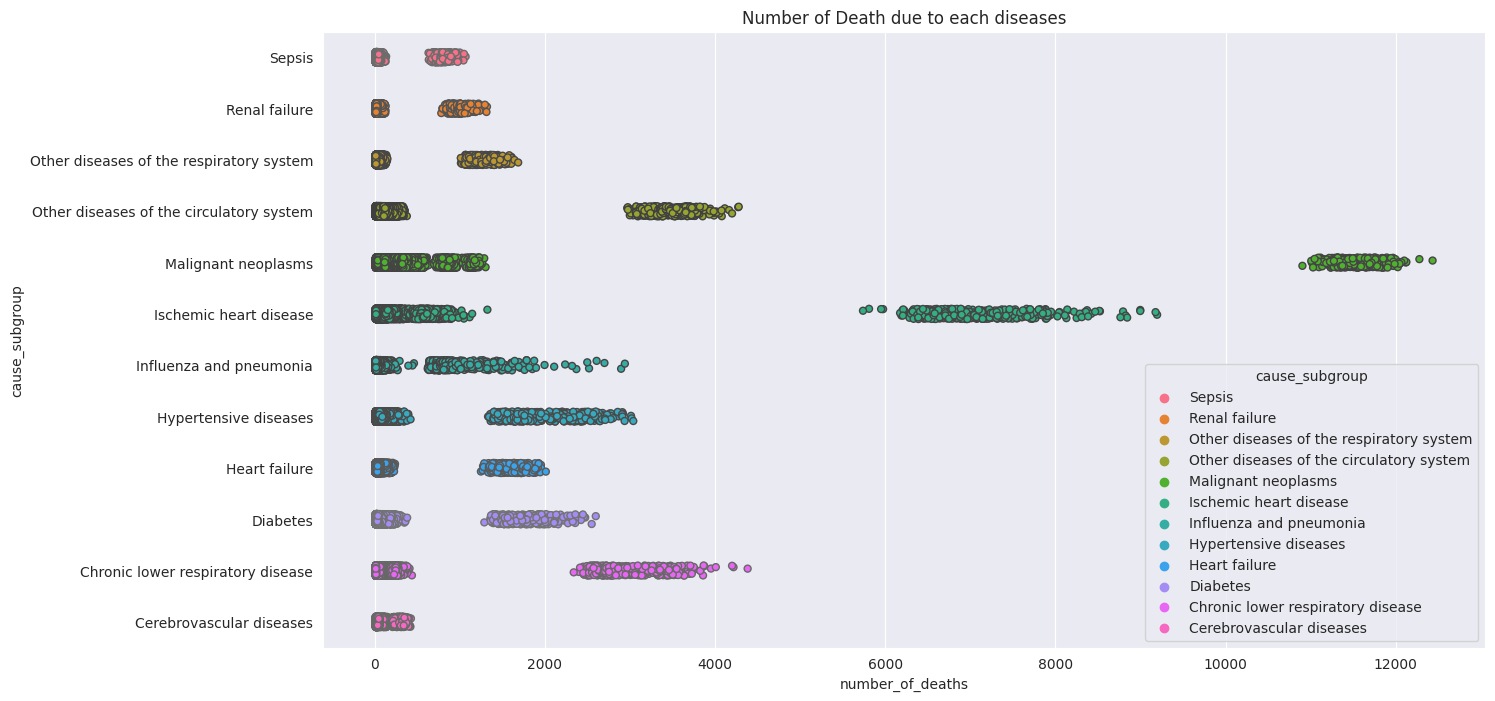

In [23]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="number_of_deaths", y="cause_subgroup", data= df, jitter=True, linewidth=1, hue = "cause_subgroup")
title = ax.set_title('Number of Death due to each diseases')